<img src="../images/aeropython_logo.png" alt="AeroPython" style="width: 300px;"/>

# Cálculo de integrales con SciPy

_`SciPy` es paquete que incluye una colección de algoritmos matemáticos y funciones construidas sobre el paquete `NumPy`. En esta clase nos vamos a centrar en el **cálculo de integrales definidas**._

Como siempre lo primero es lo primero, __importemos__ lo paquetes que vamos a utilizar:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# scipy.integrate

Este subpaquete de `SciPy` proporciona algunas __técnicas de integración tanto de funciones como de ecuaciones diferenciales__. En primer lugar importémoslo y ejecutemos la ayuda para ver cuáles son estas funciones:

In [2]:
# importamos el paquete integrate
from scipy import integrate

In [3]:
# aeropython: preserve
from IPython.display import HTML
HTML('<iframe src="http://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate" width="800" height="600"></iframe>')

In [4]:
# Help del paquete integrate
# help(integrate)

### quad

Como se puede ver en la ayuda, si queremos realizar una _integración numérica_ de una función de una variable, debemos utilizar `quad` (aunque también podemos usar `trapz`, `simps`... La forma de acceder a ella tal y como hemos importado el paquete sería ejecutando `integrate.quad`. Sin emabrgo, sería más normal importar del siguiete modo:

In [5]:
from scipy.integrate import quad

De este modo se puede usar la función quad, simplemente como `quad`. Pero todavía no sabemos cómo funciona, ¿te atreves a investigarlo tú?

In [6]:
help(quad)

Help on function quad in module scipy.integrate.quadpack:

quad(func, a, b, args=(), full_output=0, epsabs=1.49e-08, epsrel=1.49e-08, limit=50, points=None, weight=None, wvar=None, wopts=None, maxp1=50, limlst=50)
    Compute a definite integral.
    
    Integrate func from `a` to `b` (possibly infinite interval) using a
    technique from the Fortran library QUADPACK.
    
    Parameters
    ----------
    func : {function, scipy.LowLevelCallable}
        A Python function or method to integrate.  If `func` takes many
        arguments, it is integrated along the axis corresponding to the
        first argument.
    
        If the user desires improved integration performance, then `f` may
        be a `scipy.LowLevelCallable` with one of the signatures::
    
            double func(double x)
            double func(double x, void *user_data)
            double func(int n, double *xx)
            double func(int n, double *xx, void *user_data)
    
        The ``user_data`` is the 

Quizá [esta ayuda](http://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate) te resulte más atractiva.

¿Qué es lo primero que necesitamos hacer para integrar una función? Pues sí, la función... definamos una:

$$f(x) = x \cdot sin(x)$$

In [7]:
def fun(x):
    return x * np.sin(x)

##### Ejercicio

Antes de integrarla genera esta gráfica:

![](../images/quad_xsinx.png)

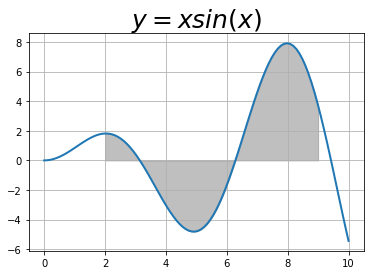

In [8]:
# generar la x y la y
x = np.linspace(0,10,100)
y = fun(x)

# título
plt.title('$y = x sin(x)$', fontsize = 25)

# pintando la línea
plt.plot(x,y, linewidth = 2)

# pintando el relleno
x_fill = np.linspace(2,9,100)
y_fill = fun(x_fill)
plt.fill_between(x_fill, y_fill, color='gray', alpha=0.5)

# poniendo la cuadrícula
plt.grid()

#### Ahora integremos con `quad`

__Integremos__ la función en el intervalo $[2, 9]$. Recuerda que esto te calcula la integral, _no el área_:

In [9]:
value, err = quad(fun, 2, 9)
print("El resultado es: ", value, "con un error de: ", err)

El resultado es:  6.870699742283883 con un error de:  2.864870105641461e-13


#### Simpson y trapecio

Según figura en la documentación a estos métodos hay que pasarles las coordenadas de los puntos (no la función). Esto puede ser útil si no disponemos de una función, sino de una serie da valores, que por ejemplo, provienen de un experimento.

![](../images/trap_xsinx.png)

In [10]:
x = np.linspace(2,9,100)

value = integrate.trapz(fun(x), x)

print("El resultado es: ", value)

El resultado es:  6.867422661707985


In [11]:
x = np.linspace(2,9,100)

value = integrate.simps(fun(x), x)

print("El resultado es: ", value)

El resultado es:  6.870575909500406


---
<br/>
#### <h4 align="right">¡Síguenos en Twitter!
<br/>
###### <a href="https://twitter.com/AeroPython" class="twitter-follow-button" data-show-count="false">Follow @AeroPython</a> <script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script> 
<br/>
###### Este notebook ha sido realizado por: Juan Luis Cano, y Álex Sáez 
<br/>
##### <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es"><img alt="Licencia Creative Commons" style="border-width:0" src="http://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Curso AeroPython</span> por <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Juan Luis Cano Rodriguez y Alejandro Sáez Mollejo</span> se distribuye bajo una <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es">Licencia Creative Commons Atribución 4.0 Internacional</a>.

---
_Las siguientes celdas contienen configuración del Notebook_

_Para visualizar y utlizar los enlaces a Twitter el notebook debe ejecutarse como [seguro](http://ipython.org/ipython-doc/dev/notebook/security.html)_

    File > Trusted Notebook

In [12]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../styles/aeropython.css'
HTML(open(css_file, "r").read())